<a href="https://colab.research.google.com/github/mahessh77melo/kingjames/blob/master/Lebron_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
%matplotlib inline

In [ ]:
leb = pd.read_excel('lebron_career.csv.xlsx')

In [ ]:
leb.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,2003-10-29,18-303,CLE,SAC,L (-14),1900-01-01 18:00:00,12,20,0.600,0,2,0.0,1,3,0.333,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18-304,CLE,PHO,L (-9),1900-01-01 17:00:00,8,17,0.471,1,5,0.2,4,7,0.571,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18-306,CLE,POR,L (-19),1900-01-01 15:00:00,3,12,0.250,0,1,0.0,2,2,1.000,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18-310,CLE,DEN,L (-4),1900-01-01 17:00:00,3,11,0.273,0,2,0.0,1,1,1.000,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18-312,CLE,IND,L (-1),1900-01-01 20:00:00,8,18,0.444,1,2,0.5,6,7,0.857,0,5,5,3,0,0,7,23,9.0,-7


In [ ]:
leb.columns

Index(['game', 'date', 'age', 'team', 'opp', 'result', 'mp', 'fg', 'fga',
       'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus'],
      dtype='object')

<BarContainer object of 2 artists>

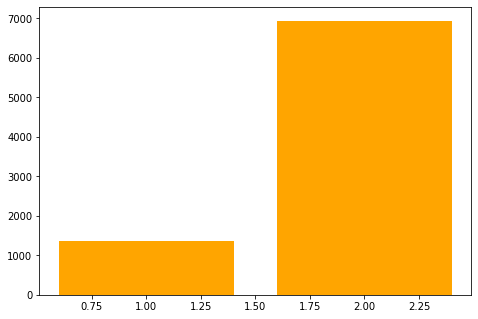

In [ ]:
fig,axes=plt.subplots()
axes=fig.add_axes([0,0,1,1])
axes.bar([1,2],[leb['orb'].sum(),leb['drb'].sum()],color='orange')

In [ ]:
leb['drb'].sum()

6947

In [ ]:
leb['game'].count()

1132

In [ ]:
#total points in christmas matches
leb[leb['date'].apply(lambda x:str(x)[5:10]=='12-25')]['pts'].sum()

321

In [ ]:
#total wins on christmas day
u=leb['date'].apply(lambda x:str(x)[5:10]=='12-25')
leb[u & leb['result'].apply(lambda x : str(x)[0]=='W')]['game'].count()

8

In [ ]:
#getting the date of lebron's largest victory (by pt-dif)
t=leb['result'].apply(lambda c:int(c[3:-1]))
#converting the string into int after avoiding the brackets .
t.max()

39

In [ ]:
t.min()
#this is his worst loss. but recently he lost to the pacers by 42 :(

-35

In [ ]:
#longest 55% fg streak
t=leb['fgp']>=0.55

In [ ]:
# NOW ONTO THE BIG ONE
#Lebron's Longest streak of 60% fg and 30 pts
cv=0
cl=[]
for i in range(len(leb)):
    if leb['fgp'][i] >= 0.6 and leb['pts'][i]>=30 :
        cv+=1
    else :
        cl.append([cv,i-cv,i])
        cv=0
max(cl)
print("The Longest 30 pt + 60% streak is ",max(cl)[0]," games.")
leb[max(cl)[1]:max(cl)[2]]
#Displaying those matches

The Longest 30 pt + 60% streak is  6  games.


,game,date,age,team,opp,result,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
732,44,2013-02-03,28-035,MIA,TOR,W (+15),1900-01-01 15:44:00,10,16,0.625,1,2,0.500,9,11,0.818,0,8,8,7,2,0,3,30,27.9,29
733,45,2013-02-04,28-036,MIA,CHA,W (+5),1900-01-01 14:00:00,13,14,0.929,0,0,NaN,5,6,0.833,0,8,8,8,2,0,5,31,30.6,8
734,46,2013-02-06,28-038,MIA,HOU,W (+6),1900-01-01 12:37:00,11,18,0.611,3,6,0.500,7,10,0.700,1,5,6,5,0,2,4,32,24.9,4
735,47,2013-02-08,28-040,MIA,LAC,W (+22),1900-01-01 06:59:00,9,11,0.818,4,5,0.800,8,11,0.727,1,4,5,6,0,2,5,30,26.0,21
736,48,2013-02-10,28-042,MIA,LAL,W (+10),1900-01-01 12:15:00,12,18,0.667,1,2,0.500,7,8,0.875,1,6,7,4,3,0,4,32,26.5,7
737,49,2013-02-12,28-044,MIA,POR,W (+13),1900-01-01 14:45:00,11,15,0.733,1,3,0.333,7,8,0.875,0,6,6,9,3,2,1,30,35.0,21


In [ ]:
leb.iloc[738]
# So, for real, lebron breaks his historic streak with a 39 pt 58% fg game going 14 on 24. Shame on you KING..

game                           50
date          2013-02-14 00:00:00
age                        28-046
team                          MIA
opp                           OKC
result                    W (+10)
mp            1900-01-01 16:02:00
fg                             14
fga                            24
fgp                         0.583
three                           4
threeatt                        8
threep                        0.5
ft                              7
fta                             9
ftp                         0.778
orb                             3
drb                             9
trb                            12
ast                             7
stl                             2
blk                             0
tov                             4
pts                            39
game_score                   33.5
minus_plus                     15
Name: 738, dtype: object